In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import numpy as np
import cv2
import os

In [6]:
#0-eyes open
#1-eyes close
#2-no yawn
#3-yawn
X = []
y = []
for img_name in os.listdir("./gdrive/MyDrive/data_augmented/closed"):
    img = cv2.imread(f"./gdrive/MyDrive/data_augmented/closed/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(1)

for img_name in os.listdir("./gdrive/MyDrive/data_augmented/open"):
    img = cv2.imread(f"./gdrive/MyDrive/data_augmented/open/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(0)

for img_name in os.listdir("./gdrive/MyDrive/data_augmented/yawn"):
    img = cv2.imread(f"./gdrive/MyDrive/data_augmented/yawn/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(3)

for img_name in os.listdir("./gdrive/MyDrive/data_augmented/no_yawn"):
    img = cv2.imread(f"./gdrive/MyDrive/data_augmented/no_yawn/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(2)

In [7]:
X = np.array(X)
y = np.array(y)
X = X.reshape((-1, 100, 100, 1))

In [8]:
print(len(X), len(y))

22017 22017


In [9]:
print(X.shape, y.shape)

(22017, 100, 100, 1) (22017,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(17613, 100, 100, 1) (17613,) (4404, 100, 100, 1) (4404,)


In [12]:
nsamples, nx, ny, nrgb = X_train.shape
x_train2 = X_train.reshape((nsamples,nx*ny*nrgb))

In [18]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train2,y_train)

RandomForestClassifier()

In [19]:
nsamples, nx, ny, nrgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*nrgb))

In [20]:
y_pred=model.predict(x_test2)
y_pred

array([0, 3, 3, ..., 2, 2, 3])

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1473
           1       0.91      0.96      0.93       867
           2       0.89      0.75      0.81      1221
           3       0.71      0.86      0.78       843

    accuracy                           0.88      4404
   macro avg       0.87      0.88      0.87      4404
weighted avg       0.88      0.88      0.88      4404



In [22]:

from sklearn.metrics import accuracy_score, log_loss

# assuming model is already trained and X_test and y_test are defined

# y_pred = model.predict(X_test) # predict labels for X_test
y_pred_prob = model.predict_proba(x_test2) # predict probabilities for X_test
y_pred = model.predict(x_test2) # predict labels for X_test
accuracy = accuracy_score(y_pred,y_test) # compute accuracy
loss = log_loss(y_test, y_pred_prob)
# loss = log_loss(y_pred,y_test) # compute loss

acc_history = [accuracy] # create a list to store accuracy for each epoch
loss_history = [loss] # create a list to store loss for each epoch


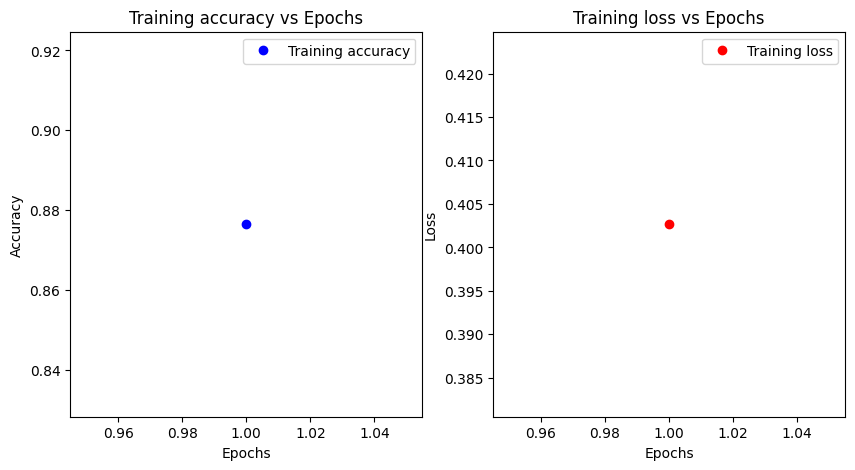

In [23]:
import matplotlib.pyplot as plt

# assuming acc_history and loss_history are lists of accuracy and loss values for each epoch

# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# plot accuracy vs epochs in the first subplot
epochs = range(1, len(acc_history) + 1)
ax1.plot(epochs, acc_history, 'bo', label='Training accuracy')
ax1.set_title('Training accuracy vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# plot loss vs epochs in the second subplot
epochs = range(1, len(loss_history) + 1)
ax2.plot(epochs, loss_history, 'ro', label='Training loss')
ax2.set_title('Training loss vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()


In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn=KNeighborsClassifier(n_neighbors=7)

In [26]:
knn.fit(x_train2,y_train)

KNeighborsClassifier(n_neighbors=7)

In [27]:
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([0, 2, 3, ..., 2, 2, 3])

In [28]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1589
           1       0.92      0.64      0.75      1333
           2       0.64      0.74      0.68       897
           3       0.46      0.81      0.59       585

    accuracy                           0.74      4404
   macro avg       0.73      0.74      0.72      4404
weighted avg       0.79      0.74      0.75      4404



In [29]:

from sklearn.metrics import accuracy_score, log_loss

# assuming model is already trained and X_test and y_test are defined

# y_pred = model.predict(X_test) # predict labels for X_test
y_pred_prob =knn.predict_proba(x_test2) # predict probabilities for X_test
y_pred_knn = knn.predict(x_test2) # predict labels for X_test
accuracy_knn = accuracy_score(y_pred_knn,y_test) # compute accuracy
loss_knn = log_loss(y_test, y_pred_prob)
# loss = log_loss(y_pred,y_test) # compute loss

acc_history = [accuracy_knn] # create a list to store accuracy for each epoch
loss_history = [loss_knn] # create a list to store loss for each epoch


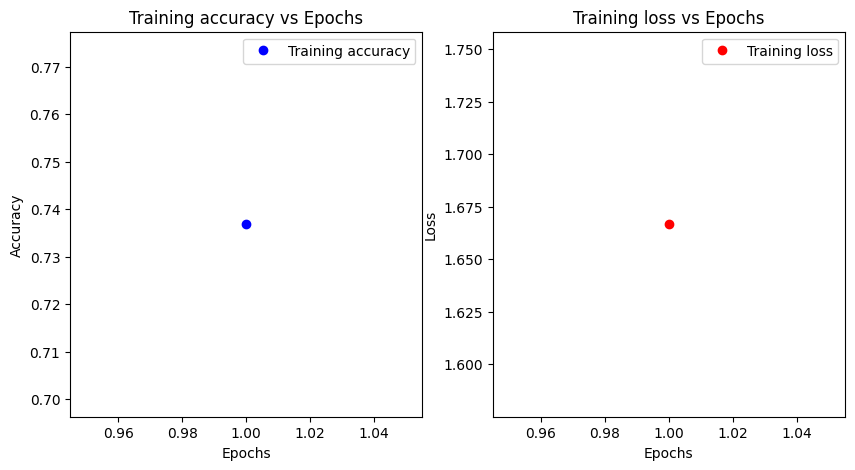

In [30]:
import matplotlib.pyplot as plt

# assuming acc_history and loss_history are lists of accuracy and loss values for each epoch

# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# plot accuracy vs epochs in the first subplot
epochs = range(1, len(acc_history) + 1)
ax1.plot(epochs, acc_history, 'bo', label='Training accuracy')
ax1.set_title('Training accuracy vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# plot loss vs epochs in the second subplot
epochs = range(1, len(loss_history) + 1)
ax2.plot(epochs, loss_history, 'ro', label='Training loss')
ax2.set_title('Training loss vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()


In [13]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train2, y_train) 

SVC(kernel='linear', random_state=0)

In [15]:
nsamples, nx, ny, nrgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*nrgb))

In [16]:
y_pred_svm= classifier.predict(x_test2)
y_pred_svm

array([0, 3, 3, ..., 0, 2, 0])

In [31]:
accuracy_score(y_pred_svm,y_test)
print(classification_report(y_pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1803
           1       0.85      0.66      0.74      1190
           2       0.52      0.71      0.60       762
           3       0.47      0.73      0.57       649

    accuracy                           0.70      4404
   macro avg       0.68      0.70      0.67      4404
weighted avg       0.75      0.70      0.71      4404



In [32]:

from sklearn.metrics import accuracy_score, log_loss


# y_pred_prob =classifier.predict_proba(x_test2) # predict probabilities for X_test
y_pred_svm = classifier.predict(x_test2) # predict labels for X_test
accuracy_svm = accuracy_score(y_pred_svm,y_test) # compute accuracy
loss_svm = log_loss(y_test, y_pred_prob)
# loss = log_loss(y_pred,y_test) # compute loss

acc_history = [accuracy_svm] # create a list to store accuracy for each epoch
loss_history = [loss_svm] # create a list to store loss for each epoch


AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt

# assuming acc_history and loss_history are lists of accuracy and loss values for each epoch

# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# plot accuracy vs epochs in the first subplot
epochs = range(1, len(acc_history) + 1)
ax1.plot(epochs, acc_history, 'bo', label='Training accuracy')
ax1.set_title('Training accuracy vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# plot loss vs epochs in the second subplot
epochs = range(1, len(loss_history) + 1)
ax2.plot(epochs, loss_history, 'ro', label='Training loss')
ax2.set_title('Training loss vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()


In [33]:
from sklearn.tree import DecisionTreeClassifier  
dt= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dt.fit(x_train2, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [34]:
y_pred_dt= dt.predict(x_test2)
y_pred_dt

array([0, 3, 3, ..., 2, 2, 1])

In [35]:
accuracy_score(y_pred_dt,y_test)
print(classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1449
           1       0.83      0.77      0.80       993
           2       0.64      0.67      0.66       993
           3       0.60      0.63      0.62       969

    accuracy                           0.74      4404
   macro avg       0.73      0.73      0.73      4404
weighted avg       0.75      0.74      0.74      4404



In [36]:

from sklearn.metrics import accuracy_score, log_loss

# assuming model is already trained and X_test and y_test are defined

# y_pred = model.predict(X_test) # predict labels for X_test
y_pred_prob = dt.predict_proba(x_test2) # predict probabilities for X_test
y_pred_dt = dt.predict(x_test2) # predict labels for X_test
accuracy_dt = accuracy_score(y_pred_dt,y_test) # compute accuracy
loss_dt = log_loss(y_test, y_pred_prob)
# loss = log_loss(y_pred,y_test) # compute loss

acc_history = [accuracy_dt] # create a list to store accuracy for each epoch
loss_history = [loss_dt] # create a list to store loss for each epoch


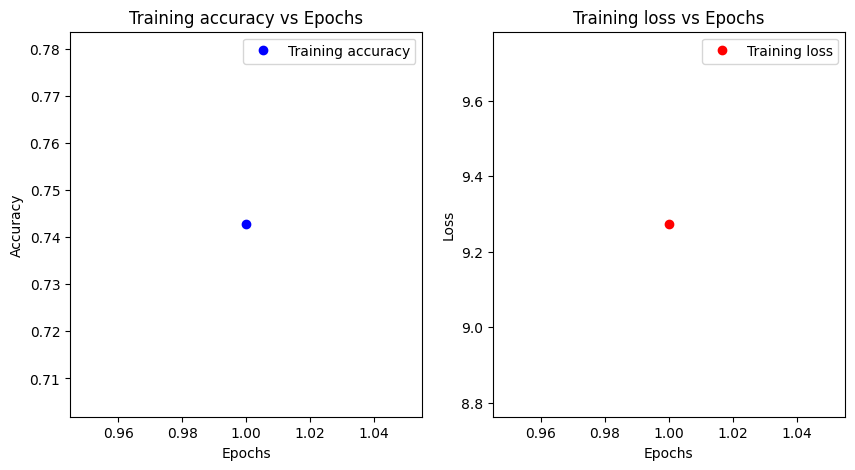

In [37]:
import matplotlib.pyplot as plt

# assuming acc_history and loss_history are lists of accuracy and loss values for each epoch

# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# plot accuracy vs epochs in the first subplot
epochs = range(1, len(acc_history) + 1)
ax1.plot(epochs, acc_history, 'bo', label='Training accuracy')
ax1.set_title('Training accuracy vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# plot loss vs epochs in the second subplot
epochs = range(1, len(loss_history) + 1)
ax2.plot(epochs, loss_history, 'ro', label='Training loss')
ax2.set_title('Training loss vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()


In [38]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train2, y_train) 

GaussianNB()

In [39]:
y_pred_nb= classifier.predict(x_test2)
y_pred_nb

array([0, 0, 0, ..., 3, 0, 2])

In [40]:
accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.71      0.51      0.59      1951
           1       0.57      0.54      0.55       969
           2       0.55      0.56      0.56      1036
           3       0.30      0.68      0.41       448

    accuracy                           0.55      4404
   macro avg       0.53      0.57      0.53      4404
weighted avg       0.60      0.55      0.56      4404



In [41]:

from sklearn.metrics import accuracy_score, log_loss


y_pred_prob =classifier.predict_proba(x_test2) # predict probabilities for X_test
y_pred_nb= classifier.predict(x_test2) # predict labels for X_test
accuracy_nb = accuracy_score(y_pred_nb,y_test) # compute accuracy
loss_nb = log_loss(y_test, y_pred_prob)
# loss = log_loss(y_pred,y_test) # compute loss

acc_history = [accuracy_nb] # create a list to store accuracy for each epoch
loss_history = [loss_nb] # create a list to store loss for each epoch


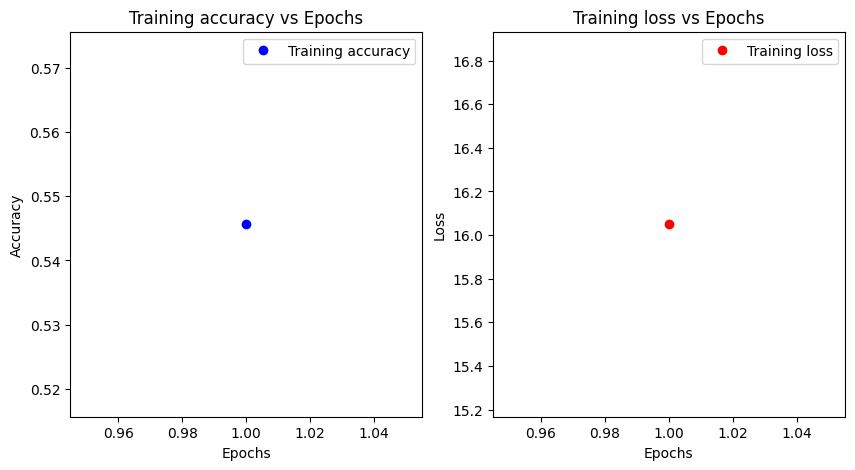

In [42]:
import matplotlib.pyplot as plt

# assuming acc_history and loss_history are lists of accuracy and loss values for each epoch

# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# plot accuracy vs epochs in the first subplot
epochs = range(1, len(acc_history) + 1)
ax1.plot(epochs, acc_history, 'bo', label='Training accuracy')
ax1.set_title('Training accuracy vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# plot loss vs epochs in the second subplot
epochs = range(1, len(loss_history) + 1)
ax2.plot(epochs, loss_history, 'ro', label='Training loss')
ax2.set_title('Training loss vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()
